In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
from skimage.transform import resize
from tensorflow import keras
import os

%matplotlib inline

In [47]:
classes = ['cat', 'dog']

Imagenes de prueba: 10


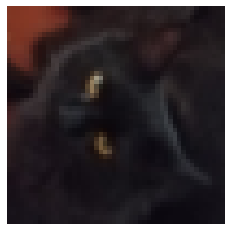

In [34]:
images = []
images_res = []

for img in os.listdir('img'):
    path = os.path.join('img', img)
    curr_img = image.imread(path)
    images.append(curr_img)
    images_res.append(resize(curr_img, (50, 50), anti_aliasing=1))


print('Imagenes de prueba:', len(images))
plt.imshow(images_res[3])
plt.axis('off');

In [35]:
#Armo el dataset

X_test = np.stack(images_res, axis=0)
print(X_test.shape, X_test.max())

(10, 50, 50, 3) 0.984313725490196


In [37]:
#Cargo el modelo ya entrenado
folder = '/home/lautaro/Desktop/Workspace/Deep_Learning/Practicas/Mias/P5'

model_path = os.path.join(folder, 'CatsvDogs.h5')

model = keras.models.load_model(model_path)
model.summary()

Model: "MyNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 32)        1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        16416     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 21, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                         

In [59]:
preds = (model.predict(X_test)+.5).astype(int)
preds

1/1 [==============================] - 0s 61ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0]])

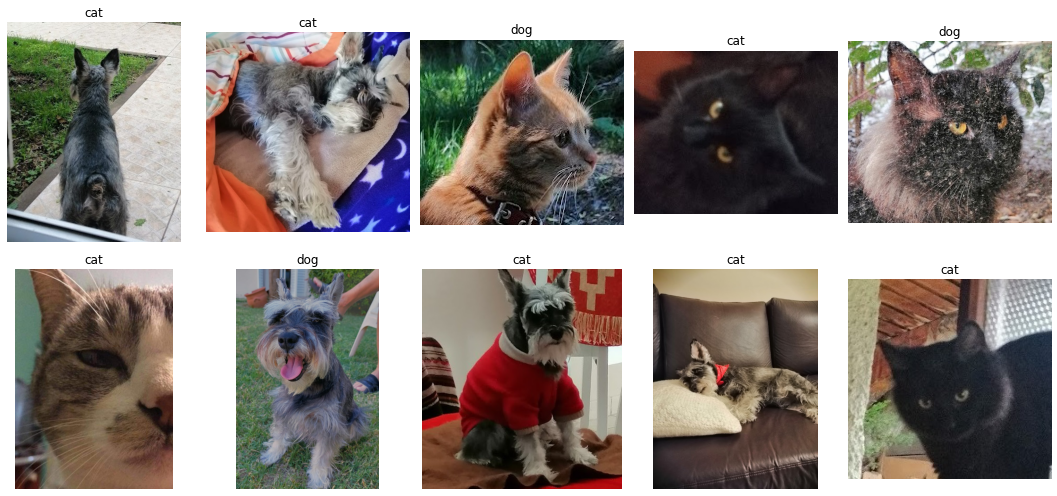

In [57]:
fig = plt.figure(figsize=(15,7))

for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(classes[preds[i][0]])
    plt.tight_layout()